In [1]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


##  박스풀랏 제작

<AxesSubplot:>

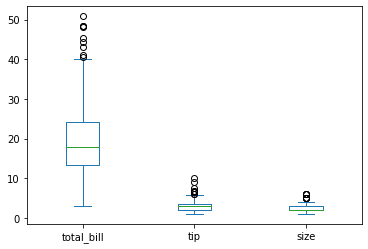

In [9]:
import matplotlib.pyplot as plt
df.plot(kind='box')

,total_bill,tip,size
total_bill,1.000000,0.623702,0.558761
tip,0.623702,1.000000,0.453050
size,0.558761,0.453050,1.000000


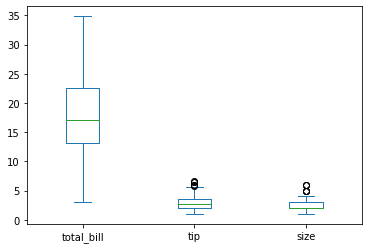

In [15]:
tmp = df[df.total_bill<=35]
tmp.plot(kind='box')
tmp.corr()

,total_bill,tip,size
total_bill,1.000000,0.670499,0.569582
tip,0.670499,1.000000,0.456563
size,0.569582,0.456563,1.000000


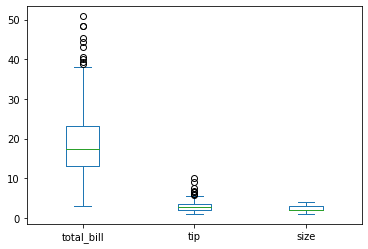

In [20]:
tmp = df[df['size']<=4]
tmp.plot(kind='box')
tmp.corr()

<AxesSubplot:>

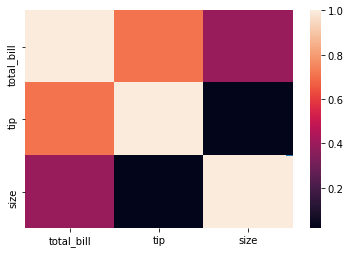

In [21]:
tmp = df[df['tip']>5]
tmp.plot(kind='box')
tmp.corr()
sns.heatmap(tmp.corr())

## 산점도 차트 작성

In [24]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

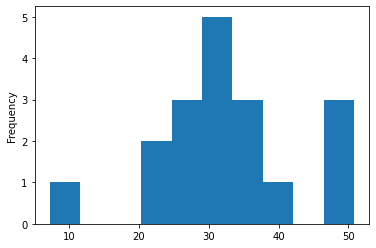

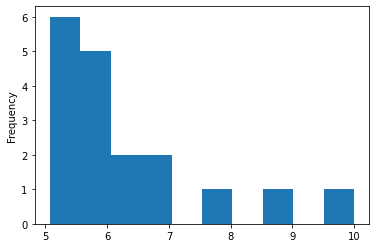

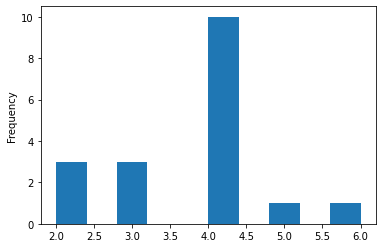

In [28]:
col = ['total_bill', 'tip', 'size']
for i in col:
    tmp[i].plot(kind='hist')
    plt.show()

array([[<AxesSubplot:title={'center':'total_bill'}>,
        <AxesSubplot:title={'center':'tip'}>],
       [<AxesSubplot:title={'center':'size'}>, <AxesSubplot:>]],
      dtype=object)

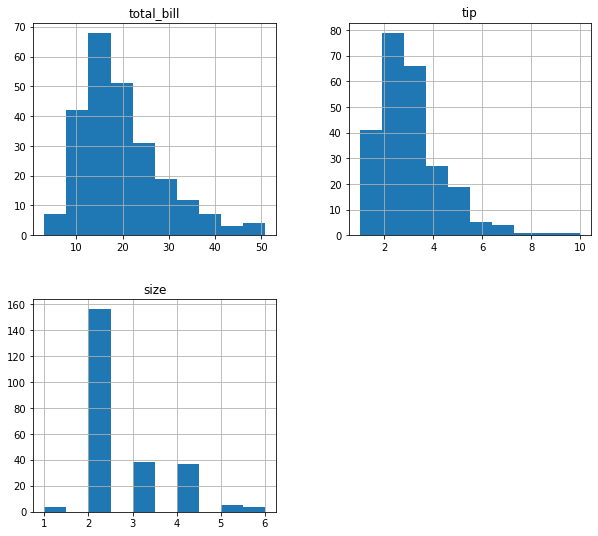

In [29]:
df.hist(figsize=(10,9))

- 전체 지불비용이 많으면 팁도 많아야하는데
- 산점도가 낮은 이유는
- 전체비용이 적은 누군가가 팁을 많이 준 자료가 있어서 그러함(특이값, 이상치?)

- total_bill값이 10이하이며 tips 값이 5이상의 값이 건수가 많은가 확인

In [35]:
df[df.total_bill<=10][df.tip >=3]

<ipython-input-35-e6fae02e9cb5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.total_bill<=10][df.tip >=3]


,total_bill,tip,sex,smoker,day,time,size
172,7.25,5.15,Male,Yes,Sun,Dinner,2
178,9.60,4.00,Female,Yes,Sun,Dinner,2


## 결측치
- 컴퓨터가 모르는값, 아무것도 없는것, 코드로 구현 불가능, 문자코드에 할당안된값

In [37]:
df.isna().sum() #결측치 확인

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<AxesSubplot:>

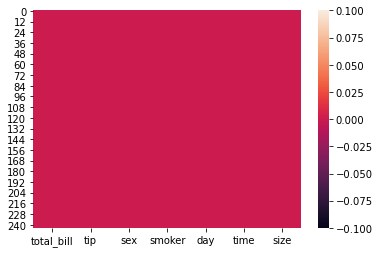

In [49]:
sns.heatmap(df.isnull()) #결측치는 흭색으로 보인다

In [42]:
# 결측치 만들기
import numpy as np
tmp = df.replace(2,np.NaN)

<AxesSubplot:>

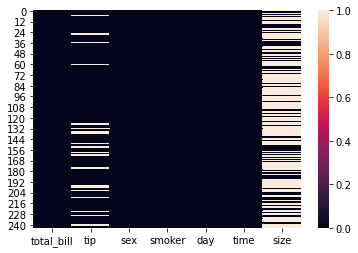

In [51]:
sns.heatmap(tmp.isnull())
#이때 결측지가 모여있는곳을 확인해서 
# 결측치가 있는곳의 값의 연관성을 찾는게 좋다

In [58]:
# tip
# list 와 array 의 차이
# list 기억장소로서 같은 곳에 모인 자료의 형이 일치하지 않아도 되고,
# 자료의 원소갯수가 일치 않아도 됨(연산불가능)
# array  연산가능한 데이터 가로세로의 원소집합, 같은집합체에는 형과 원소
# 개수가 일치해야함 (연산가능)

a = np.array([[1,2,3], [5,7,8]])
w = [
    [10],
    [20]
]
a*w

array([[ 10,  20,  30],
       [100, 140, 160]])

In [75]:
a = np.array([[1,2,3], [5,7,8]])
w = [
    [[10]],
    [[20]]
]
a*w

array([[[ 10,  20,  30],
        [ 50,  70,  80]],

       [[ 20,  40,  60],
        [100, 140, 160]]])

In [63]:
def barplot1(var1):
    ax = sns.barplot(x=var1, y='tip', data=df)

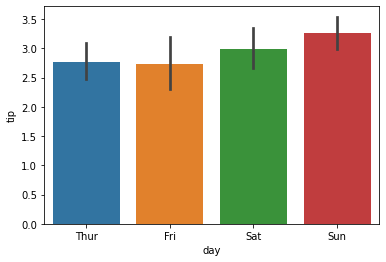

In [80]:
barplot1('day')

In [83]:
def barplot2(var1, var2):
    ax = sns.barplot(x=var1,hue=var2 ,y='tip', data=df)

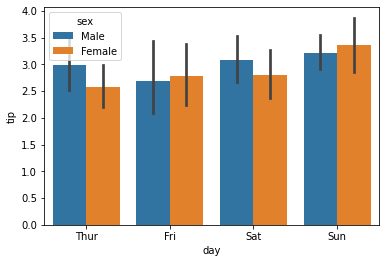

In [84]:
barplot2('day', 'sex')

### 194 페이지 더미변수

In [91]:
import pandas as pd
pd.get_dummies(df['day'])

,Thur,Fri,Sat,Sun
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
239,0,0,1,0
240,0,0,1,0
241,0,0,1,0
242,0,0,1,0


In [99]:
pd.get_dummies(data=df,columns=['day'], prefix='d')

,total_bill,tip,sex,smoker,time,size,d_Thur,d_Fri,d_Sat,d_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,0,0,1,0
240,27.18,2.00,Female,Yes,Dinner,2,0,0,1,0
241,22.67,2.00,Male,Yes,Dinner,2,0,0,1,0
242,17.82,1.75,Male,No,Dinner,2,0,0,1,0


In [110]:
#원핫인코딩과 더미의 차이인가 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = LabelEncoder()
encoder.fit(df['day'])
x = encoder.transform(df['day'])
x

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [111]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
x = df['day']
encoder.fit(x)
x = encoder.transform(df['day'])
x

ValueError: Expected 2D array, got 1D array instead:
array=['Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun'
 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat'
 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat'
 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun'
 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sat' 'Sat' 'Sat' 'Sat'
 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat'
 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur'
 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Fri' 'Fri' 'Fri' 'Fri'
 'Fri' 'Fri' 'Fri' 'Fri' 'Fri' 'Fri' 'Fri' 'Fri' 'Sat' 'Sat' 'Sat' 'Sat'
 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Thur'
 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur'
 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur'
 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur'
 'Thur' 'Thur' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun'
 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sat' 'Sat' 'Sat' 'Sat'
 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun'
 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Sun' 'Thur' 'Thur' 'Thur' 'Thur'
 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur' 'Thur'
 'Thur' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat'
 'Sat' 'Sat' 'Sat' 'Fri' 'Fri' 'Fri' 'Fri' 'Fri' 'Fri' 'Fri' 'Sat' 'Sat'
 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat' 'Sat'
 'Sat' 'Sat' 'Thur'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.